<a href="https://colab.research.google.com/github/MisaelDinis/Misael-Dinis/blob/main/Dentista_Taxa_de_Cancelamentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Importação das Bibliotecas necessarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import datetime as dt


In [22]:
df = pd.read_csv('/content/Planilha sem título - Página1.csv')

In [23]:
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y')
df['HORA'] = pd.to_datetime(df['HORA'], format='%H:%M')

In [5]:
df.dtypes

,0
ID,int64
NOME,object
IDADE,int64
GENERO,object
EMAIL,object
ENDERECO,object
BAIRRO,object
CIDADE,object
ESTADO,object
ESTADO CIVIL,object


In [24]:
# Filtrar apenas os registros com status 'Cancelado'

cancelamentos_df = df[df['STATUS'] == 'Cancelado']
df['Cancelamentos'] = df['NOME'].map(cancelamentos_df.groupby('NOME').size())

# Preencher NaN com 0 para clientes sem cancelamentos

df['Cancelamentos'] = df['Cancelamentos'].fillna(0).astype(int)

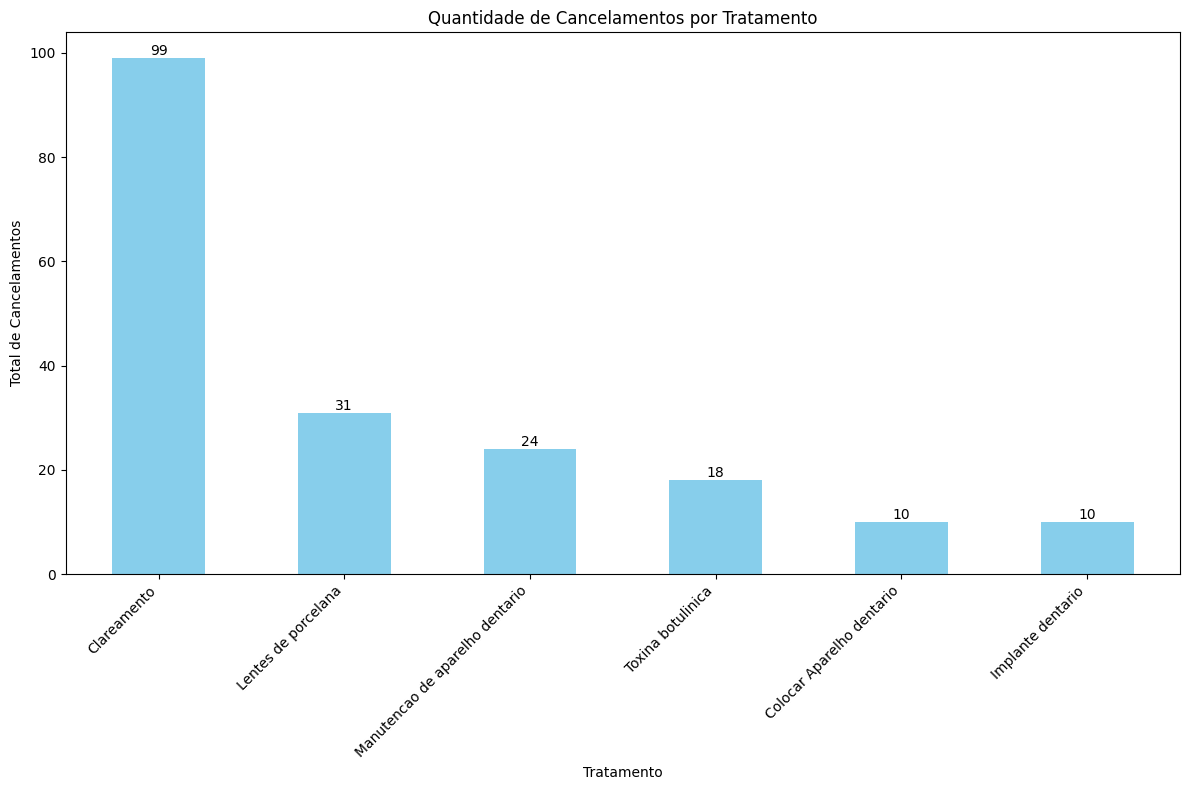

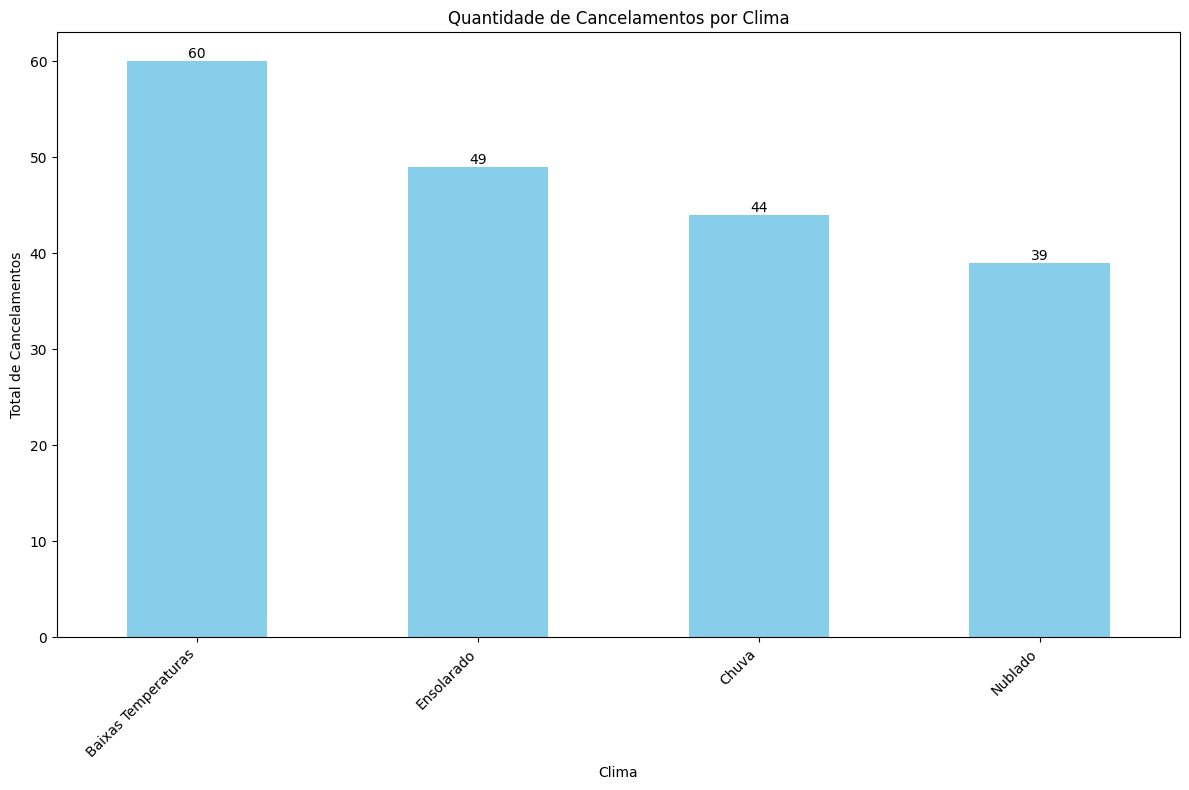

<ipython-input-29-899a0dc70f60>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='FERIADO', y='Total de Cancelamentos', data=df_grouped, palette='viridis')


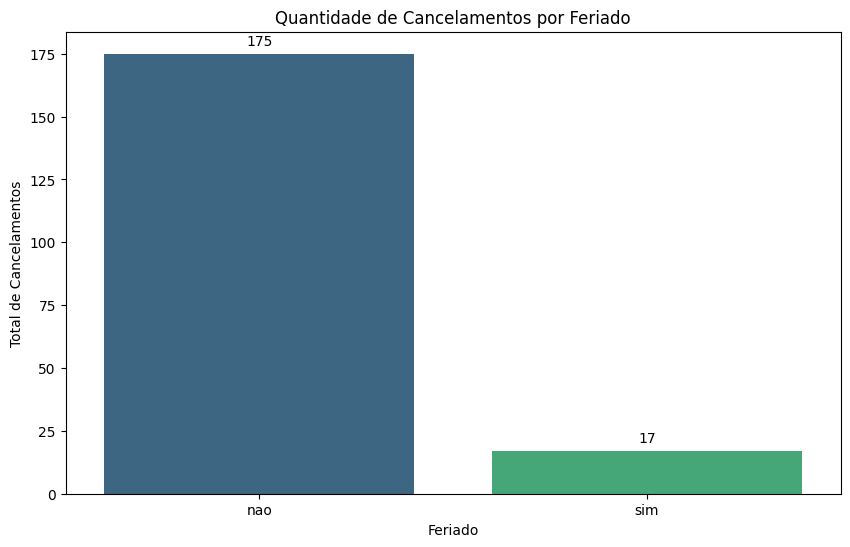

<ipython-input-29-899a0dc70f60>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='DENTISTA', y='Total de Cancelamentos', data=df_grouped, palette='viridis')


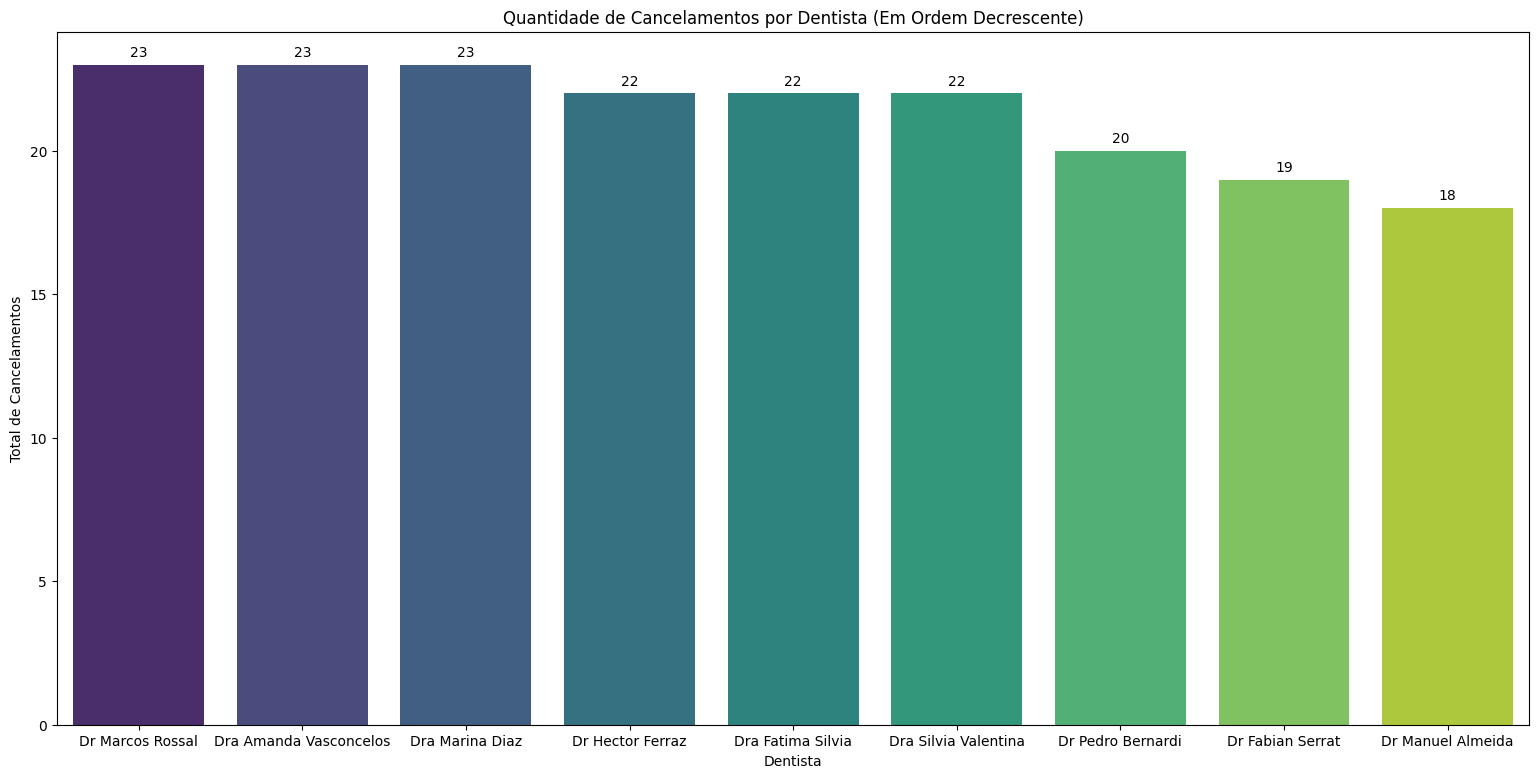

<ipython-input-29-899a0dc70f60>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='BAIRRO', y='Total de Cancelamentos', data=df_grouped, palette='viridis')


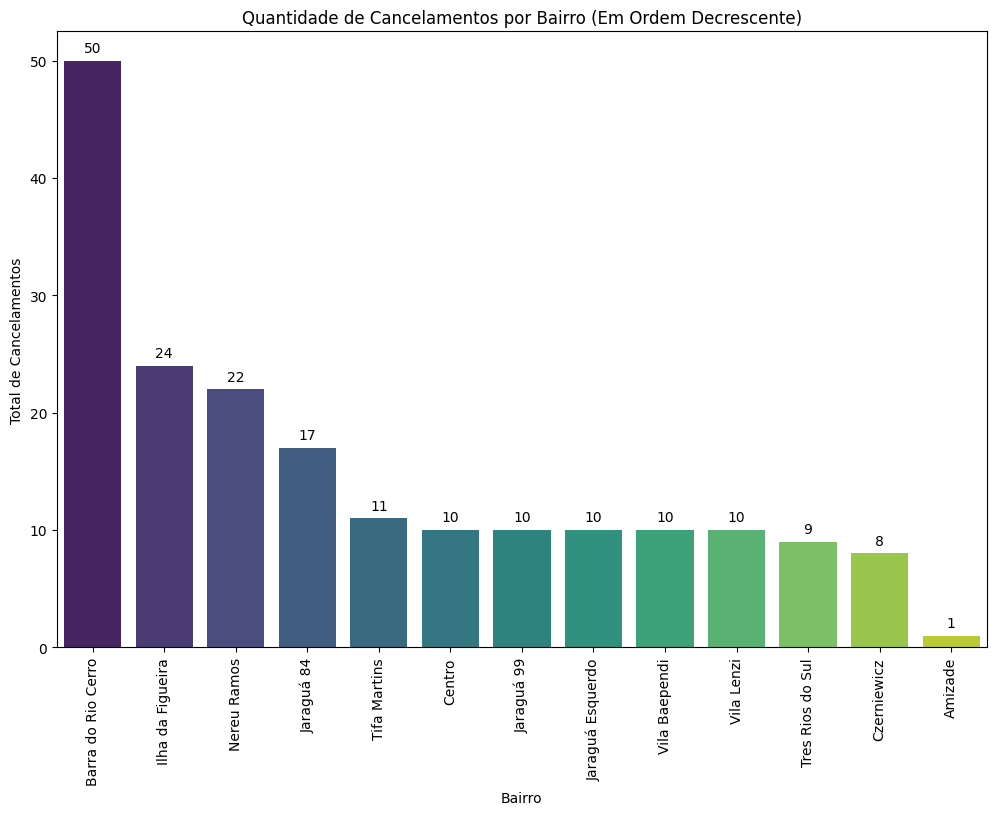

In [29]:
# Gráfico de cancelamentos por tratamento
cancelamentos_por_tratamento = df.groupby('TRATAMENTO')['CANCELAMENTOS'].sum()
cancelamentos_por_tratamento = cancelamentos_por_tratamento.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = cancelamentos_por_tratamento.plot(kind='bar', color='skyblue')

for p in ax.patches:

    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Tratamento')
plt.ylabel('Total de Cancelamentos')
plt.title('Quantidade de Cancelamentos por Tratamento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de cancelamentos por clima
cancelamentos_por_clima = df.groupby('CLIMA')['CANCELAMENTOS'].sum()
cancelamentos_por_clima = cancelamentos_por_clima.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
ax = cancelamentos_por_clima.plot(kind='bar', color='skyblue')

for p in ax.patches:

    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Clima')
plt.ylabel('Total de Cancelamentos')
plt.title('Quantidade de Cancelamentos por Clima')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico de cancelamentos de acordo com Feriado

df_grouped = df.groupby('FERIADO')['CANCELAMENTOS'].sum().reset_index()
df_grouped.rename(columns={'CANCELAMENTOS': 'Total de Cancelamentos'}, inplace=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='FERIADO', y='Total de Cancelamentos', data=df_grouped, palette='viridis')

plt.title('Quantidade de Cancelamentos por Feriado')
plt.xlabel('Feriado')
plt.ylabel('Total de Cancelamentos')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

# Gráfico de cancelamentos por Dentistas

df_grouped = df.groupby('DENTISTA')['CANCELAMENTOS'].sum().reset_index()
df_grouped.rename(columns={'CANCELAMENTOS': 'Total de Cancelamentos'}, inplace=True)
df_grouped = df_grouped.sort_values(by='Total de Cancelamentos', ascending=False)

plt.figure(figsize=(19, 9))
ax = sns.barplot(x='DENTISTA', y='Total de Cancelamentos', data=df_grouped, palette='viridis')

plt.title('Quantidade de Cancelamentos por Dentista (Em Ordem Decrescente)')
plt.xlabel('Dentista')
plt.ylabel('Total de Cancelamentos')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.show()

# Gráfico de cancelamentos por Bairro

df_grouped = df.groupby('BAIRRO')['CANCELAMENTOS'].sum().reset_index()
df_grouped.rename(columns={'CANCELAMENTOS': 'Total de Cancelamentos'}, inplace=True)
df_grouped = df_grouped.sort_values(by='Total de Cancelamentos', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='BAIRRO', y='Total de Cancelamentos', data=df_grouped, palette='viridis')

plt.title('Quantidade de Cancelamentos por Bairro (Em Ordem Decrescente)')
plt.xlabel('Bairro')
plt.ylabel('Total de Cancelamentos')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9),
                textcoords='offset points')

plt.xticks(rotation=90)

plt.show()